In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Context

In [2]:
train = pd.read_csv('train.csv')
train.info()
# Добавление колонок - из категории в число
# Пол
def is_male(sex):
    if sex == 'male':
        return 0
    else:
        return 1
# Порт отправления
def em_in_num(Em):
    if Em == 'S':
        return 0
    elif Em == 'C':
        return 1
    else:
        return 2
train['SexNum'] = train.apply(lambda x: is_male(x['Sex']), axis =  1)
train['EmbarkedNum'] = train.apply(lambda x: em_in_num(x['Embarked']), axis =  1)
print(train.describe())
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  int64  
 1   Survived     100000 non-null  int64  
 2   Pclass       100000 non-null  int64  
 3   Name         100000 non-null  object 
 4   Sex          100000 non-null  object 
 5   Age          96708 non-null   float64
 6   SibSp        100000 non-null  int64  
 7   Parch        100000 non-null  int64  
 8   Ticket       95377 non-null   object 
 9   Fare         99866 non-null   float64
 10  Cabin        32134 non-null   object 
 11  Embarked     99750 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 7.2+ MB
         PassengerId       Survived         Pclass           Age  \
count  100000.000000  100000.000000  100000.000000  96708.000000   
mean    49999.500000       0.427740       2.106910     38.355472   
std     28867.657797  

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexNum,EmbarkedNum
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S,0,0
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S,0,0
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S,0,0
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S,0,0
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S,0,0


# Data quality assessment

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age             3292
SibSp              0
Parch              0
Ticket          4623
Fare             134
Cabin          67866
Embarked         250
SexNum             0
EmbarkedNum        0
dtype: int64

PassengerId - 0.0%
Survived - 0.0%
Pclass - 0.0%
Name - 0.0%
Sex - 0.0%
Age - 3.29%
SibSp - 0.0%
Parch - 0.0%
Ticket - 4.62%
Fare - 0.13%
Cabin - 67.87%
Embarked - 0.25%
SexNum - 0.0%
EmbarkedNum - 0.0%



<AxesSubplot:xlabel='Pclass', ylabel='Age'>

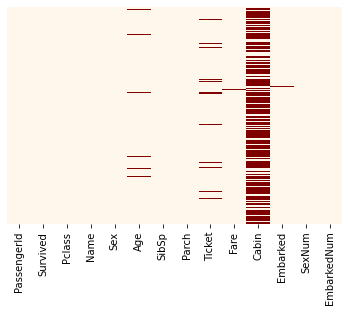

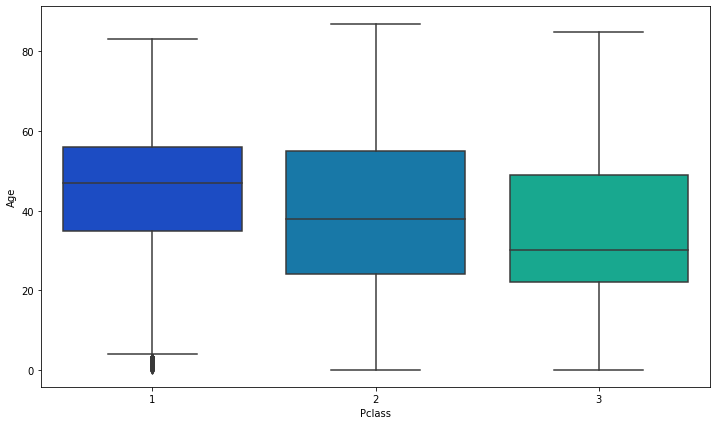

In [3]:
# 1. Анализ незаполненных данных
# 1.1. Количество незаполненных значений по столбцам
print(train.isnull().sum())
print()
# 1.2. Процент незаполненных значений по столбцам
for col in train.columns:
    pct_missing = np.mean(train[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100,2)))
print()
# 1.3. График незаполненных значений по столбцам
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='OrRd')

# 1.2. Выбросы
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')



# Data exploration

c:\users\admin\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Survived', ylabel='count'>

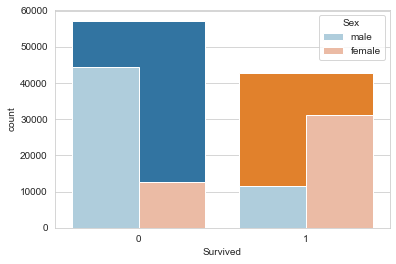

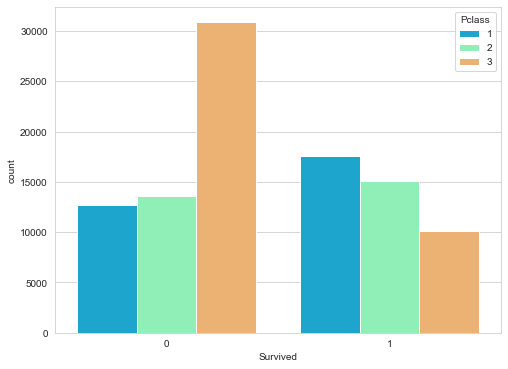

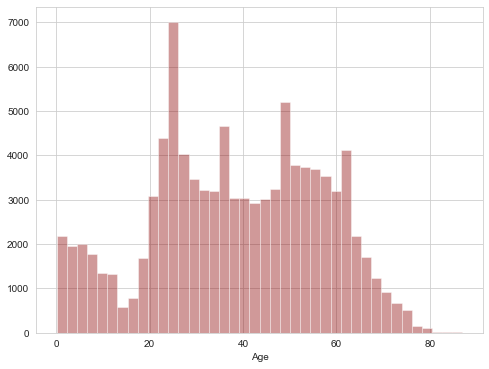

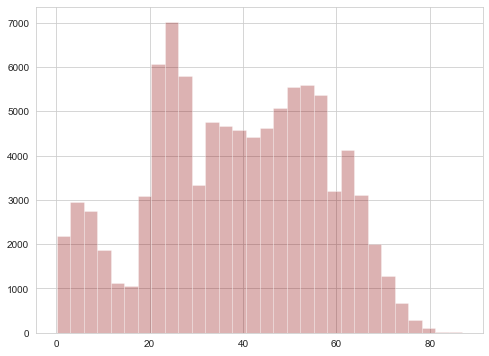

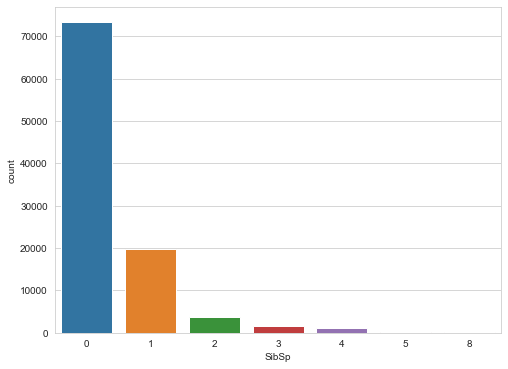

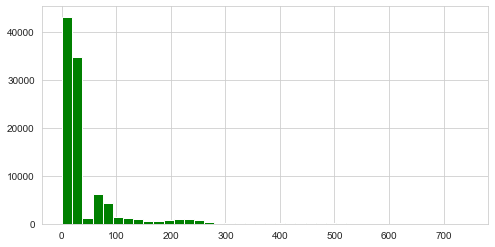

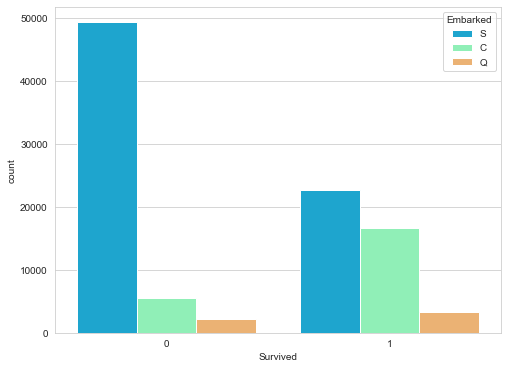

In [4]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train); sns.countplot(x='Survived',hue='Sex', data=train,palette='RdBu_r')
print()
# sns.set_style('whitegrid')
fig = plt.figure(figsize=(8, 6))
sns.countplot(x='Survived',hue='Pclass', data=train,palette='rainbow')
fig = plt.figure(figsize=(8, 6))
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=40)
fig = plt.figure(figsize=(8, 6))
train['Age'].hist(bins=30,color='darkred',alpha=0.3)
fig = plt.figure(figsize=(8, 6))
sns.countplot(x='SibSp',data=train)
fig = plt.figure(figsize=(8, 6))
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

fig = plt.figure(figsize=(8, 6))
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Embarked', data=train,palette='rainbow')

# Summary

In [5]:
# Из 100 тыс. человек выжило (%)
# Выжило больше женщин (%), чем мужчин
# Распределение по классам ()
# Распределение по возрасту


SyntaxError: invalid syntax (3049321248.py, line 1)